In [1]:
%cd ~/NetBeansProjects/ExpLosion/
from notebooks.common_imports import *

from gui.user_code import get_demsar_diagram, get_demsar_params
from gui.output_utils import *


sns.timeseries.algo.bootstrap = my_bootstrap
sns.categorical.bootstrap = my_bootstrap

/Users/miroslavbatchkarov/NetBeansProjects/ExpLosion


In [2]:
# modified from http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(gold, pred, title='Confusion matrix', cmap=plt.cm.Blues):
    cm = confusion_matrix(gold, pred)
    # normalize
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    
    target_names = unique_labels(gold, pred)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Is there a difference in the precision-recall values of different models? 

In [77]:
query_dict = {'expansions__vectors__rep': 0, 
              'expansions__k':3,
              'labelled':'amazon_grouped-tagged',
            'expansions__use_similarity': 0, 
            'expansions__neighbour_strategy':'linear',
            'expansions__vectors__dimensionality': 100, 
            'document_features_ev': 'AN+NN', 
            'document_features_tr': 'J+N+AN+NN', 
            'expansions__allow_overlap': False,
            'expansions__entries_of': None,
            'expansions__vectors__algorithm': 'glove',
            'expansions__vectors__composer__in': ['Left'],
            'expansions__vectors__unlabelled': 'wiki',
              'expansions__vectors__unlabelled_percentage':100,
            'expansions__decode_handler': 'SignifiedOnlyFeatureHandler',
            'expansions__noise': 0}
ids = Experiment.objects.filter(**query_dict).order_by('expansions__vectors__unlabelled_percentage',
                                                           'expansions__vectors__composer').values_list('id', flat=True)

In [78]:
ids

[99]

In [79]:
get_ci(ids[0])[:-1]

Calculating CI for exp 99


(0.32220181204476817, 0.31142298809735297, 0.33296367027891277)

In [80]:
results = Results.objects.get(id=ids[0], classifier='MultinomialNB')
pred = results.predictions
gold = results.gold

In [81]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.multiclass import unique_labels
print(classification_report(gold, pred))

             precision    recall  f1-score   support

 Automotive       0.48      0.28      0.36      3517
       Baby       0.15      0.18      0.16       952
     Beauty       0.41      0.40      0.41      2885
      Patio       0.23      0.33      0.27      2012
Pet_Supplies       0.28      0.33      0.30      1892

avg / total       0.36      0.32      0.33     11258



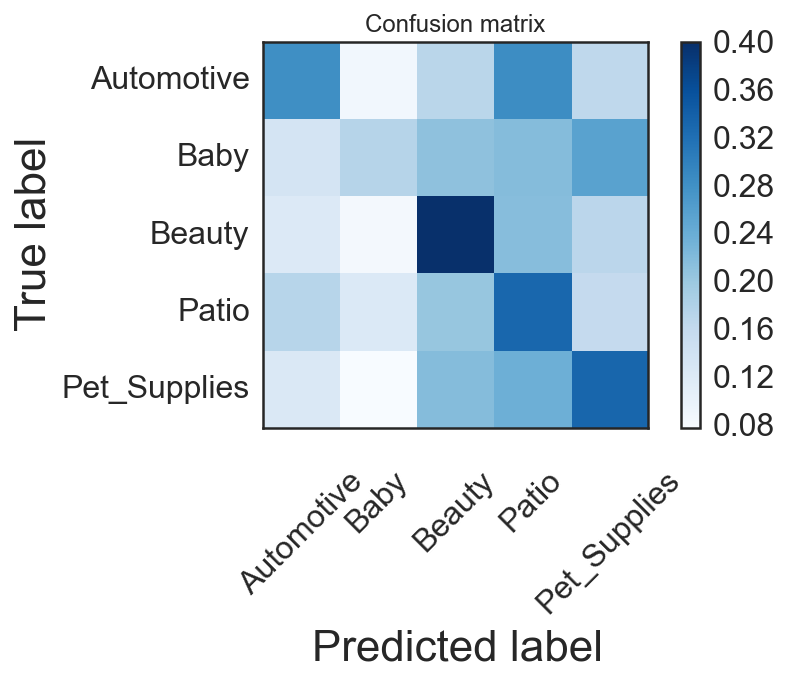

In [95]:
sns.set_style('white')
plot_confusion_matrix(gold, pred)

### Overall, precision and recall are balanced and roughly equal. Better models are better in both P and R.

#  What's in each cluster when using VQ?

In [2]:
path = '../FeatureExtractionToolkit/word2vec_vectors/composed/AN_NN_word2vec-wiki_100percent-rep0_Add.events.filtered.strings.kmeans2000'
df = pd.read_hdf(path, key='clusters')

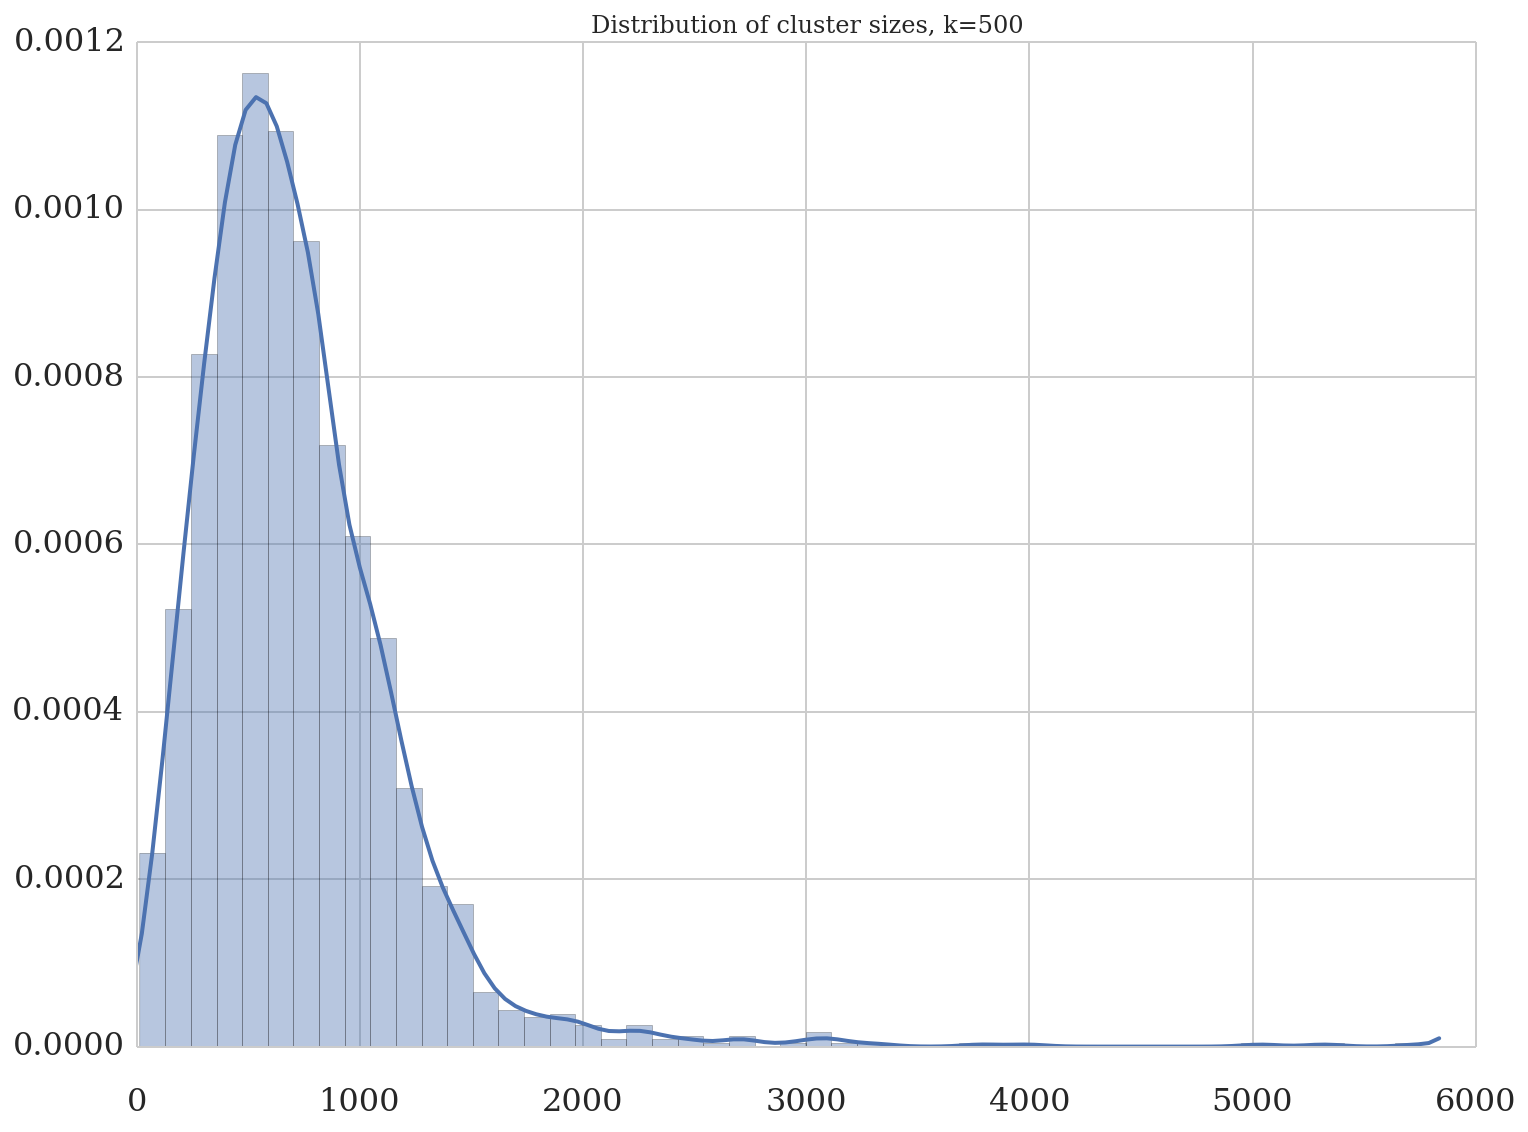

In [3]:
counts = df.clusters.value_counts()
g = sns.distplot(counts.values, kde_kws={'cut':True})
g.set(xlim=(0, None))
plt.title('Distribution of cluster sizes, k=500');

In [4]:
counts.describe()

count    2000.000000
mean      718.324500
std       465.353889
min        14.000000
25%       424.000000
50%       637.000000
75%       912.000000
max      5752.000000
dtype: float64

# Find the smallest cluster and print phrases it contains

In [5]:
df[df.clusters==counts.argmin()].head(20)

,clusters
arabia/N_s/N,88
century/N_s/N,88
chili/N_s/N,88
holy/J_s/N,88
marshal/N_s/N,88
mid/J_s/N,88
s/N_fighting/N,88
s/N_marshal/N,88
s/N_war/N,88
s/N_world/N,88


In [6]:
df[df.clusters == 5]
# cluster 5 (negative sentiment), 2 (royalty), 8 (cheap, expencive) are very sensible
# cluster 3 ('arm'), 1 ('product'), 15 (hot), 16 (playing) are dominated by a single word (may contain multiple senses, e.g. hot water, hot waiter)
# cluster 6 (grand slam, grand prix, door slam) dominated by a few words and a polysemous word bridging senses
# cluster 10- film characters + misc
# 11 - sentiment, mix of positive and negative
# 13- named entities
# 14- arche, tower, veranda + related words + other senses (arch enemy)

,clusters
amazing/J_inconvenience/N,5
appalling/J_guy/N,5
appalling/J_sight/N,5
appalling/J_wardrobe/N,5
awesome/J_condition/N,5
awful/J_breath/N,5
awful/J_doe/N,5
awful/J_drinking/N,5
awful/J_make-up/N,5
awkward/J_watch/N,5


In [22]:
from collections import Counter
Counter([str(x).split('_')[0] for x in df[df.clusters == 5].index]).most_common(10)

[('bad/J', 726),
 ('good/J', 84),
 ('poor/J', 26),
 ('horrible/J', 8),
 ('luck/N', 5),
 ('worse/J', 5),
 ('mild/J', 4),
 ('awful/J', 4),
 ('terrible/J', 3),
 ('dumb/J', 3)]

### Large clusters form (this one is 934 unigrams and NP) that share a word (e.g. bad occurs in 726 of those), and even though they are not pure (e.g. good is also in that cluster 84 times) the vast majority of "bad" stuff ends up in cluster 5, which starts to correspond to negative sentiment. This can be something the classifier picks up on.

# For comparison, nearest neighbours using a KDTree 

In [8]:
from discoutils.thesaurus_loader import Vectors as vv
# not quite the same vectors (15% vs 100%), but that's all I've got on this machine
v = vv.from_tsv('../FeatureExtractionToolkit/word2vec_vectors/composed/AN_NN_word2vec-wiki_15percent-rep0_Add.events.filtered.strings')

In [11]:
v.init_sims(n_neighbors=30)

In [24]:
v.get_nearest_neighbours('bad/J')[:5]

[('bad/J_mascara/N', 0.82403180623602257),
 ('bad/J_cliche/N', 0.94285643516288287),
 ('bad/J_muffler/N', 1.1265192609954571),
 ('bad/J_film-making/N', 1.2079414756874656),
 ('bad/J_travesty/N', 1.2208708506852237)]

# Let's find if there is a positive sentiment cluster

In [34]:
cluster_num = df.ix['good/J_guy/N'][0]
print(cluster_num)
df[df.clusters == cluster_num]

1384


,clusters
adequate/J_fancy/N,1384
adequate/J_fun/N,1384
adequate/J_potty/N,1384
adequate/J_treat/N,1384
all-round/J,1384
all-round/J_compromise/N,1384
amazing/J_benefit/N,1384
amazing/J_support/N,1384
ample/J_choice/N,1384
appropriate/J_kid/N,1384


In [29]:
Counter([str(x).split('_')[0] for x in df[df.clusters == cluster_num].index]).most_common(10)

[('good/J', 1008),
 ('excellent/J', 149),
 ('decent/J', 105),
 ('perfect/J', 42),
 ('nice/J', 37),
 ('little/J', 19),
 ('quick/J', 11),
 ('welcome/J', 10),
 ('poor/J', 10),
 ('awesome/J', 9)]

In [47]:
cluster_num = df.ix['good/J_movie/N'][0]
print(cluster_num)
df[df.clusters == cluster_num]

524


,clusters
abhorrent/J_movie/N,524
absurd/J_movie/N,524
absurdist/J_movie/N,524
abysmal/J_movie/N,524
acclaimed/J_sensation/N,524
accurate/J_movie/N,524
accursed/J_movie/N,524
action-packed/J_movie/N,524
adorable/J_commercial/N,524
adorable/J_feature/N,524


In [46]:
Counter([str(x).split('_')[1] for x in df[df.clusters == cluster_num].index]).most_common(10)

[('movie/N', 830),
 ('b-movie/N', 43),
 ('dubbing/N', 17),
 ('cinema/N', 13),
 ('lack/V', 11),
 ('blockbuster/N', 11),
 ('technicolor/N', 9),
 ('tv-movie/N', 8),
 ('commercial/N', 8),
 ('voice-over/N', 7)]

In [48]:
df[df.clusters == counts.argmax()] # these appear to be names, they are 99% unigrams

,clusters
;-rrb-/N,281
abadie/N,281
abagnale/N,281
abberline/N,281
abberton/N,281
abbett/N,281
abbi/N,281
abe/N,281
abednego/N,281
aberlin/N,281


# Does the same hold for Turian vectors?

In [49]:
path = '../FeatureExtractionToolkit/socher_vectors/composed/AN_NN_turian_Socher.events.filtered.strings.kmeans2000'
ddf = pd.read_hdf(path, key='clusters')

In [57]:
cluster_num = ddf.ix['bad/J_guy/N'][0]
print(cluster_num)
ddf[ddf.clusters == cluster_num]

1545


,clusters
absent/J_guy/N,1545
absolute/J_guy/N,1545
abusive/J_guy/N,1545
active/J_guy/N,1545
advertised/J_guy/N,1545
aged/J_guy/N,1545
aggressive/J_guy/N,1545
all-time/J_guy/N,1545
alright/J_guy/N,1545
amateur/J_guy/N,1545


In [60]:
Counter([str(x).split('_')[1] for x in ddf[ddf.clusters == cluster_num].index]).most_common(10)

[('guy/N', 412), ('lesson/N', 3), ('speck/N', 2), ('bystander/N', 1)]

# Is it OK to use accuracy instead of Averaged F1 score? 

3
4
142
158
159
161
163
167
173
174
175
176
177
178
245
250
251
252
253
255
256
257
258


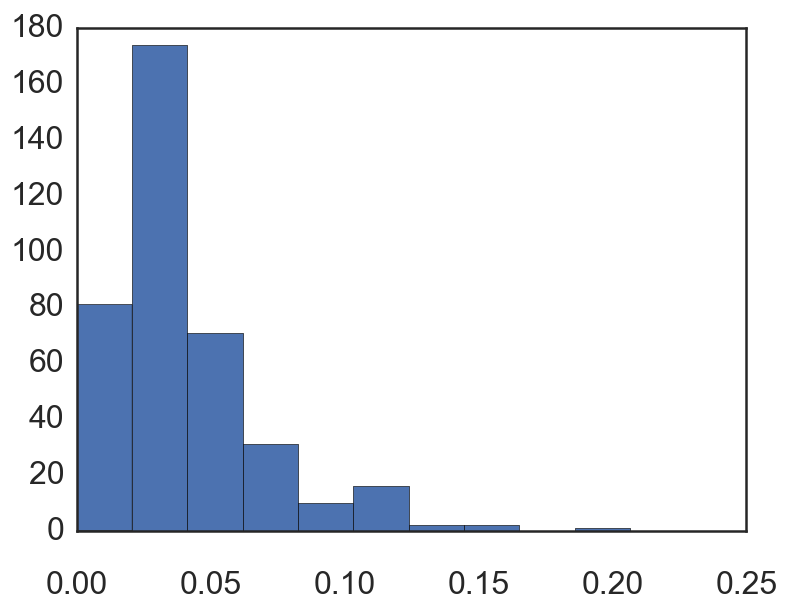

In [92]:
gaps = []
for r in Results.objects.filter(classifier=CLASSIFIER):
    gap = r.accuracy_mean - r.macrof1_mean 
    if abs(gap) > 0.1:
        print(r.id.id)
    gaps.append(gap)
plt.hist(gaps);

# Are neighbours of words other words, and is there grouping by PoS tag?

In [9]:
from discoutils.thesaurus_loader import Vectors
from discoutils.tokens import DocumentFeature
v = Vectors.from_tsv('../FeatureExtractionToolkit/word2vec_vectors/word2vec-wiki-15perc.unigr.strings.rep0')

In [66]:
from random import sample
sampled_words = sample(list(v.keys()), 5000)
v.init_sims(n_neighbors=100)

In [67]:
data = []
for w in sampled_words:
    doc_feat = DocumentFeature.from_string(w)
    if doc_feat.tokens[0].pos == 'N' and np.random.uniform() < 0.8:
        # too many nouns, ignore some of them
        continue
    neigh = v.get_nearest_neighbours(w)
    for rank, (n, sim) in enumerate(neigh):
        pospos = doc_feat.tokens[0].pos + DocumentFeature.from_string(n).tokens[0].pos
        data.append([''.join(pospos), sim, rank])

In [68]:
df = pd.DataFrame(data, columns='pospos sim rank'.split())
mask = df.pospos.str.len() == 2
df = df[mask]
df.pospos.value_counts(), df.shape

(NN    67211
 JN    39311
 JJ    26200
 VN    17364
 VV     9391
 NJ     5924
 VJ     5916
 JV     3013
 NV     1314
 dtype: int64, (175644, 3))

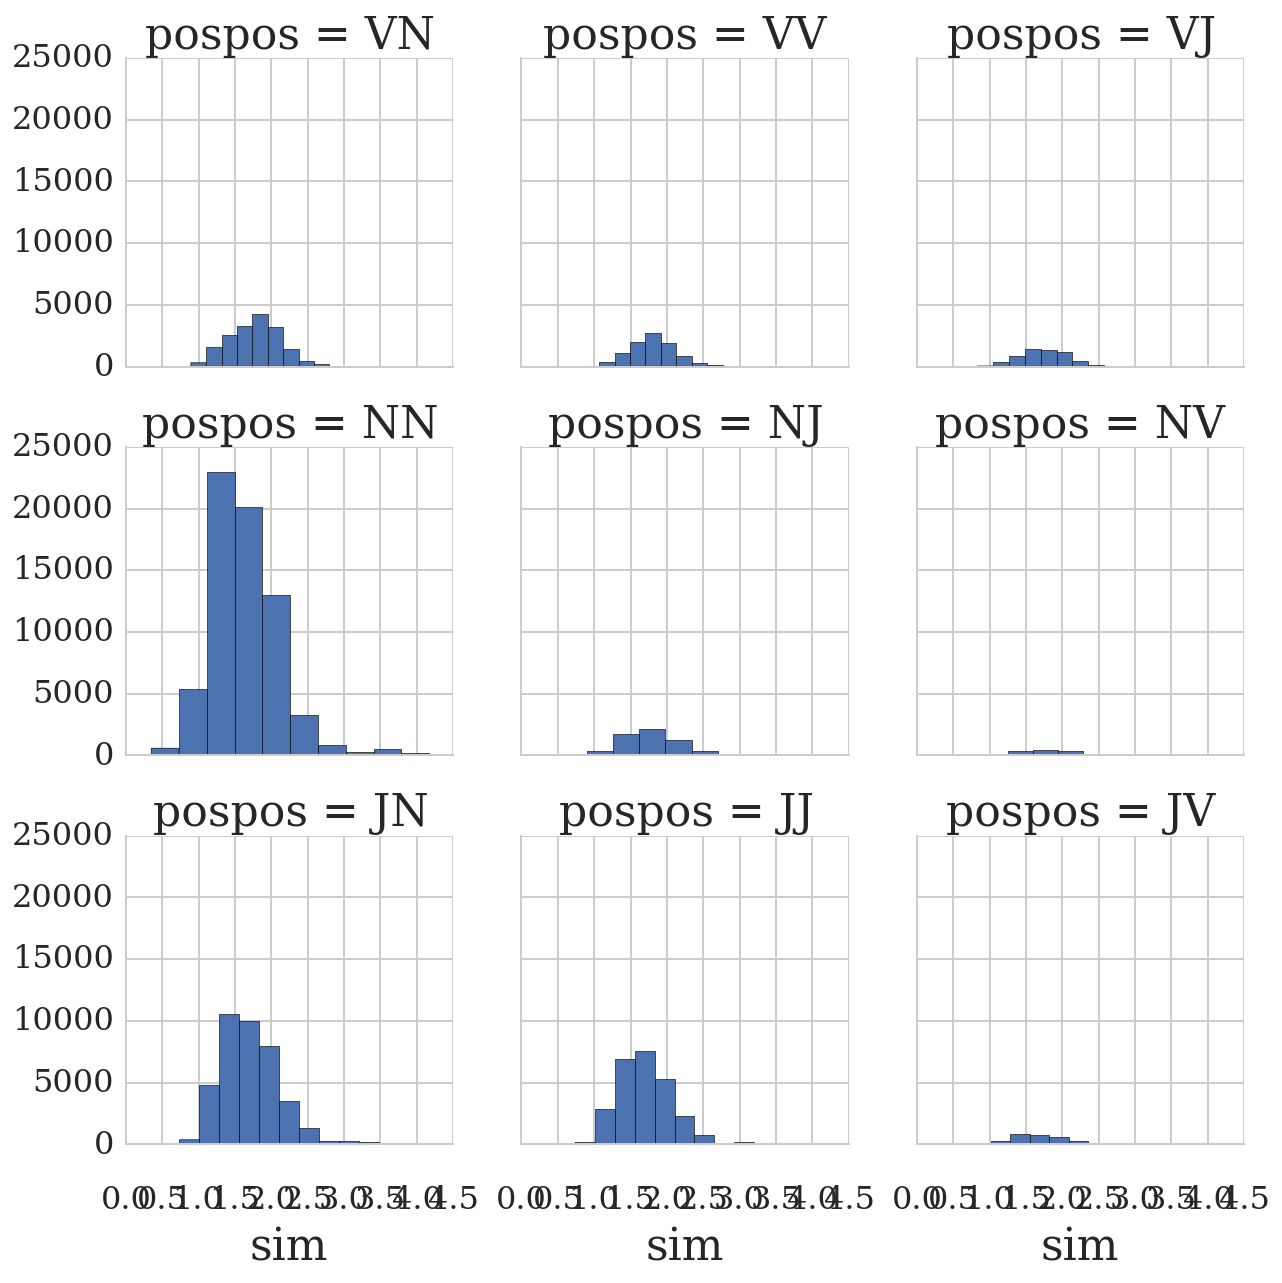

In [69]:
g = sns.FacetGrid(df, col='pospos', col_wrap=3);
g.map(plt.hist, 'sim');

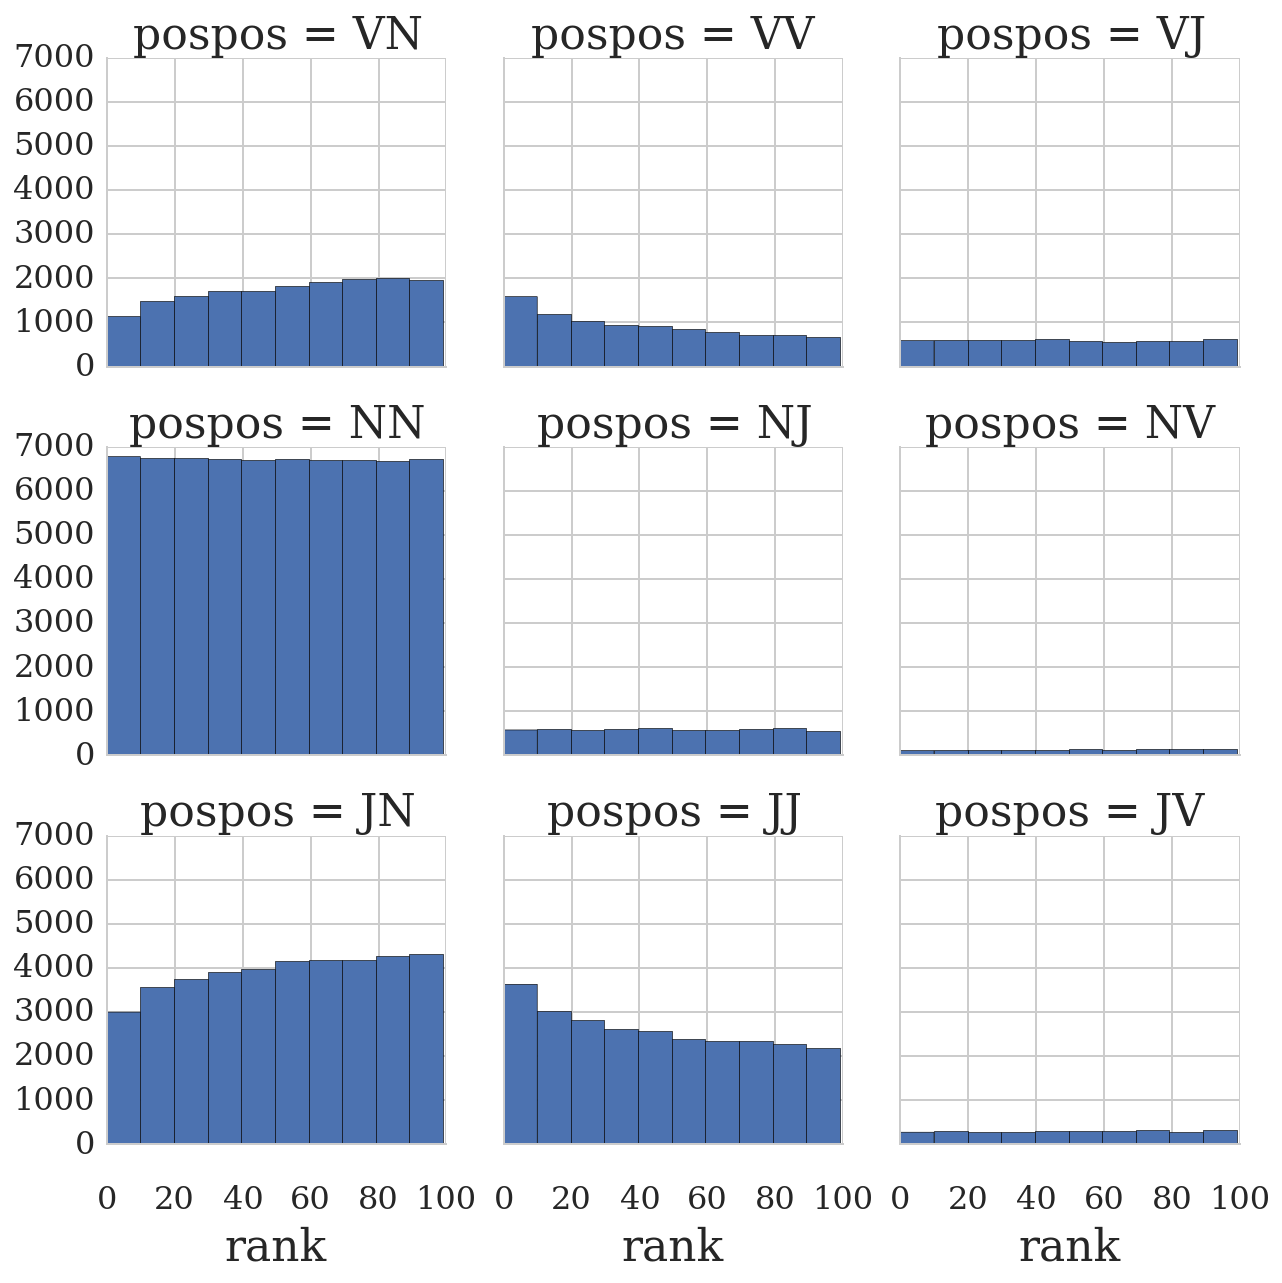

In [70]:
g = sns.FacetGrid(df, col='pospos', col_wrap=3);
g.map(plt.hist, 'rank');